In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import plotly.graph_objects as go

In [530]:
import pandas as pd
import glob

path = r'C:\Users\prate\Documents\IE\Assignment1\Data\DroughtWise\rainfall' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [532]:
frame.T

,0,1,2,3,4,5,6,7,8,9,...,4222,4223,4224,4225,4226,4227,4228,4229,4230,4231
Product code,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,...,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001,IDCJAC0001
Station Number,87161,87161,87161,87161,87161,87161,87161,87161,87161,87161,...,86142,86142,86142,86142,86142,86142,86142,86142,86142,86142
Year,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,53.7,22.9,13.7,40.9,51.6,44.6,34.9,41.6,47.4,13.1,...,NaN,18.2,NaN,60.8,103.2,66.8,90.6,21,203.4,191.4
Feb,27.4,11.5,36,31,16.3,18.4,3.2,60.7,5.7,1.5,...,70.4,105.8,NaN,74.2,43.4,64,12,31.2,131.6,38
Mar,37.7,33.4,34.2,9.3,94.9,16.2,16.3,26.1,39.4,78.3,...,127.8,93.1,NaN,90.4,89.5,68,57.3,13.8,132,109.4
Apr,105,10.8,9,68.3,65.2,19.4,30.5,16.5,22.1,43,...,107.8,42,NaN,85.4,83.8,135.4,22.6,72,238.6,99
May,119.9,30.7,7.9,26.1,77,39.3,29.7,78.5,22.8,59.8,...,147.4,81.6,NaN,132.8,130.4,65.9,169.6,166.2,112.4,112.6
Jun,5.6,29.6,45.5,65.8,42.6,11,32,62,17,26.3,...,152.4,100.6,NaN,61.5,127,38.7,90.4,86,121.2,221.6
Jul,61.7,15.4,16.5,30.2,59.8,12.6,19,58.7,11,69.5,...,163.2,NaN,NaN,152.5,122,84.8,60.4,137.8,92.8,85.4


In [526]:
df1 = pd.read_csv("bacchus-merrimu.csv")
df1 = df1[['Year', 'Annual']] #selecting only two columns for the final dataset
df1 = df1[(df1['Year'] > 1990) & (df1['Year']<2019)]
if df1['Annual'].isnull().sum() < len(df1['Annual'])*0.3:
    df1['Annual'].fillna((df1['Annual'].mean()), inplace=True) 
else:
    df1['Annual'].fillna((df1['Annual'].median()), inplace=True)
    
df1.columns = ['Year', 'Bacchus Merrimu']

In [528]:
df2 = pd.read_csv("bairnsdale.csv")
df2 = df2[['Year', 'Annual']] #selecting only two columns for the final dataset
df2 = df2[(df2['Year'] > 1990) & (df2['Year']<2019)]
if df2['Annual'].isnull().sum() < len(df2['Annual'])*0.3:
    df2['Annual'].fillna((df2['Annual'].mean()), inplace=True) 
else:
    df2['Annual'].fillna((df2['Annual'].median()), inplace=True)
    
df2.columns = ['Year', 'bairnsdale']

In [136]:
df1.drop(["Product code", "Unnamed: 0"], axis = 1, inplace = True)

In [52]:
#df1 = df1.set_index('Station Number')

In [137]:
df1 = df1[df1['Year']>1990]

In [509]:
df1.shape

(1232, 3)

In [510]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Station Number,1232.0,83432.599026,4155.385142,76015.0,80021.00,84096.0,86142.000,90173.0
Year,1232.0,2004.573052,8.094859,1991.0,1998.00,2005.0,2012.000,2018.0
Annual,992.0,620.227067,275.535479,130.8,416.95,590.3,788.775,1738.4


In [511]:
df1.isnull().sum()
#features = df1.columns

Station Number      0
Year                0
Annual            240
dtype: int64

Text(0.5, 1.0, 'Total Missing Values in Every Feature')

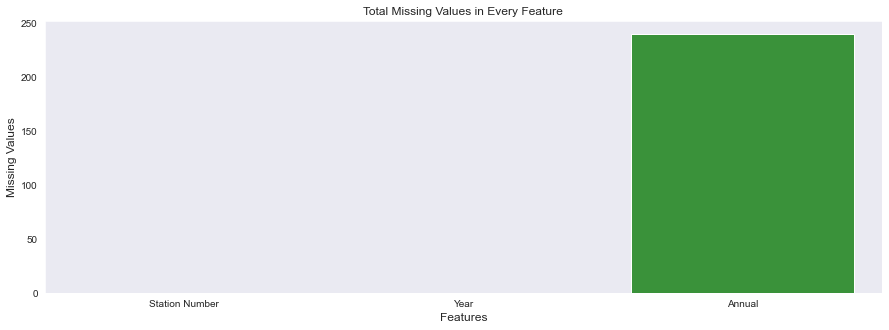

In [512]:
null_values = df1.isnull().sum()

plt.figure(figsize=(15,5))
sns.barplot(x=df1.columns, y=null_values)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.title('Total Missing Values in Every Feature', fontsize=12)

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 17 to 68
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station Number  1325 non-null   int64  
 1   Year            1325 non-null   int64  
 2   Jan             1286 non-null   float64
 3   Feb             1284 non-null   float64
 4   Mar             1282 non-null   float64
 5   Apr             1289 non-null   float64
 6   May             1287 non-null   float64
 7   Jun             1277 non-null   float64
 8   Jul             1264 non-null   float64
 9   Aug             1256 non-null   float64
 10  Sep             1239 non-null   float64
 11  Oct             1235 non-null   float64
 12  Nov             1242 non-null   float64
 13  Dec             1239 non-null   float64
 14  Annual          1032 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 165.6 KB


In [157]:
df1.mean()

Station Number    83431.701132
Year               2005.979623
Jan                  44.691913
Feb                  38.902960
Mar                  36.305226
Apr                  44.447867
May                  51.086053
Jun                  64.234299
Jul                  61.248022
Aug                  63.598169
Sep                  62.855044
Oct                  54.316397
Nov                  56.867633
Dec                  49.952381
Annual              617.849128
dtype: float64

In [165]:
for i in df1.columns:
    col_mean=df1[i].mean()
    df1[i].fillna(col_mean, inplace=True)

In [218]:
df1.to_csv('df1.csv')

array([[<AxesSubplot:title={'center':'Station Number'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Jan'}>,
        <AxesSubplot:title={'center':'Feb'}>],
       [<AxesSubplot:title={'center':'Mar'}>,
        <AxesSubplot:title={'center':'Apr'}>,
        <AxesSubplot:title={'center':'May'}>,
        <AxesSubplot:title={'center':'Jun'}>],
       [<AxesSubplot:title={'center':'Jul'}>,
        <AxesSubplot:title={'center':'Aug'}>,
        <AxesSubplot:title={'center':'Sep'}>,
        <AxesSubplot:title={'center':'Oct'}>],
       [<AxesSubplot:title={'center':'Nov'}>,
        <AxesSubplot:title={'center':'Dec'}>,
        <AxesSubplot:title={'center':'Annual'}>, <AxesSubplot:>]],
      dtype=object)

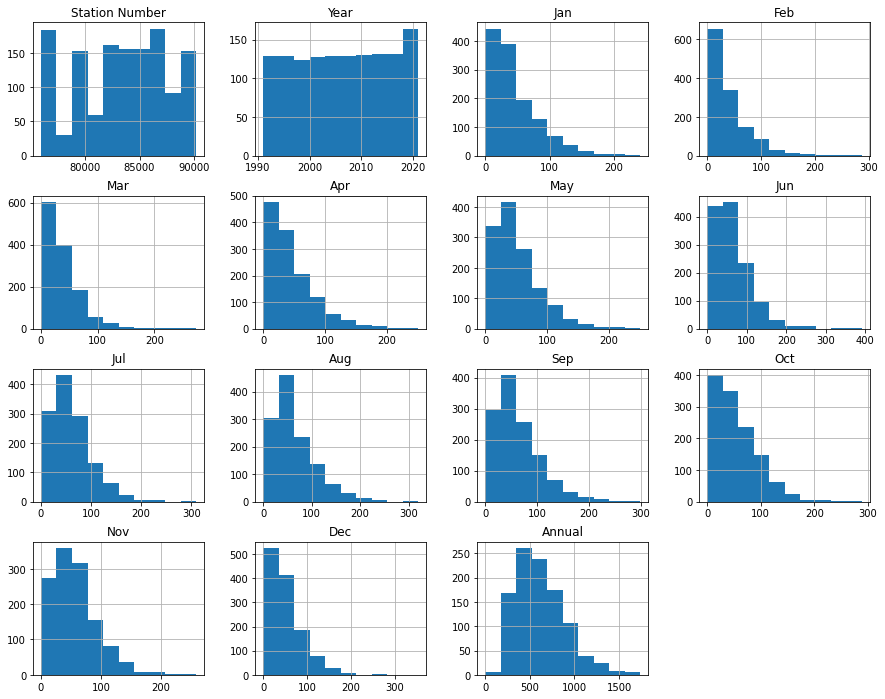

In [57]:
df1.hist(figsize=(15,12))

In [58]:
df1.skew()

Station Number   -0.207697
Year             -0.014056
Jan               1.426820
Feb               1.872415
Mar               1.890966
Apr               1.462232
May               1.375361
Jun               1.713505
Jul               1.310754
Aug               1.322520
Sep               1.326665
Oct               1.171528
Nov               1.115933
Dec               1.622041
Annual            0.785925
dtype: float64

In [59]:
df1.kurtosis()

Station Number   -0.962369
Year             -1.198857
Jan               2.476381
Feb               4.935421
Mar               6.621236
Apr               2.786940
May               2.610470
Jun               5.007727
Jul               2.597492
Aug               2.278628
Sep               2.299230
Oct               1.990338
Nov               1.862446
Dec               4.993731
Annual            0.746870
dtype: float64

<AxesSubplot:>

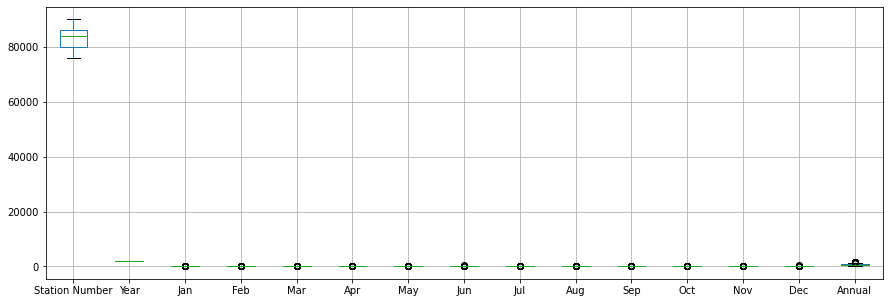

In [60]:
df1.boxplot(figsize=(15,5))

In [335]:
df = pd.read_csv("bairnsdale.csv")

In [336]:
df.head()

,Product code,Station Number,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,IDCJAC0001,84100,1933,NaN,NaN,NaN,10.9,72.4,230.9,154.4,58.7,80.5,81.0,NaN,NaN,NaN
1,IDCJAC0001,84100,1934,183.6,154.9,18.3,273.8,24.1,229.9,99.3,181.9,59.4,145.8,153.7,124.2,1648.9
2,IDCJAC0001,84100,1935,164.1,160.3,36.6,218.2,44.2,52.3,20.3,71.1,44.7,122.7,82.8,324.1,1341.4
3,IDCJAC0001,84100,1970,74.7,36.1,158.4,55.7,120.8,19.6,8.0,93.5,87.3,19.9,76.5,199.1,949.6
4,IDCJAC0001,84100,1971,155.6,94.2,37.6,15.5,38.2,17.1,12.5,22.9,72.9,33.0,103.1,64.4,667.0


In [337]:
df = df[(df.Year > 1990) & (df.Year < 2019)]

In [338]:
df.drop(["Product code"], axis = 1, inplace = True)

In [339]:
df.set_index("Station Number", inplace = True)

In [340]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
count,28.000000,27.000000,27.000000,27.000000,26.000000,26.000000,26.000000,27.000000,27.000000,28.000000,27.000000,28.000000,28.000000,19.000000
mean,2004.500000,51.225926,56.362963,45.196296,56.803846,35.476923,63.811538,43.355556,36.988889,51.310714,57.714815,69.407143,62.257143,626.857895
std,8.225975,32.360572,42.740893,30.842696,46.181775,20.909200,62.309924,30.233875,17.284149,31.084810,27.685885,35.230783,33.351944,134.747456
min,1991.000000,5.200000,7.400000,4.900000,7.000000,13.100000,10.800000,11.200000,7.000000,21.800000,6.800000,9.300000,7.200000,376.900000
25%,1997.750000,26.950000,26.200000,20.700000,24.300000,20.150000,22.450000,20.700000,23.850000,32.025000,36.000000,47.500000,40.600000,532.850000
50%,2004.500000,48.000000,42.800000,46.800000,48.450000,31.550000,44.100000,29.000000,35.800000,41.850000,58.300000,61.200000,54.400000,630.700000
75%,2011.250000,74.400000,88.000000,58.550000,65.900000,45.675000,69.925000,61.200000,50.250000,53.175000,75.200000,93.600000,78.150000,724.150000
max,2018.000000,115.800000,191.700000,152.000000,195.000000,100.600000,253.800000,115.800000,67.600000,152.100000,124.100000,152.800000,161.000000,877.700000


In [341]:
df.corr()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,1.000000,-0.377279,-0.228033,0.206396,0.230281,0.136951,0.066078,-0.097636,0.121125,-0.349501,-0.058377,-0.091555,-0.014067,-0.308624
Jan,-0.377279,1.000000,-0.180881,-0.056602,-0.103124,0.227100,-0.100812,0.435265,-0.101304,0.224453,0.036699,-0.066376,-0.085739,0.403450
Feb,-0.228033,-0.180881,1.000000,0.014922,-0.055440,-0.029881,-0.191565,-0.115961,-0.178425,-0.143405,-0.258219,0.236187,-0.123916,0.189190
Mar,0.206396,-0.056602,0.014922,1.000000,-0.135384,0.344301,0.157456,0.009924,0.078663,0.145762,0.205249,-0.152592,-0.112779,0.384825
Apr,0.230281,-0.103124,-0.055440,-0.135384,1.000000,0.005202,-0.203019,-0.088179,0.255110,-0.232814,0.027793,-0.160307,0.111355,0.079785
May,0.136951,0.227100,-0.029881,0.344301,0.005202,1.000000,-0.075968,-0.100934,0.126299,0.027797,-0.027603,-0.160753,-0.461979,0.146650
Jun,0.066078,-0.100812,-0.191565,0.157456,-0.203019,-0.075968,1.000000,-0.025761,-0.115477,0.073983,0.187769,0.147582,-0.043946,0.412275
Jul,-0.097636,0.435265,-0.115961,0.009924,-0.088179,-0.100934,-0.025761,1.000000,0.202961,0.114500,0.005136,0.061286,-0.278809,0.391080
Aug,0.121125,-0.101304,-0.178425,0.078663,0.255110,0.126299,-0.115477,0.202961,1.000000,-0.069341,0.143372,0.075420,0.231860,0.338918
Sep,-0.349501,0.224453,-0.143405,0.145762,-0.232814,0.027797,0.073983,0.114500,-0.069341,1.000000,0.480152,0.008597,0.156312,0.503277


Text(0.5, 1.0, 'Total Missing Values in Every Feature')

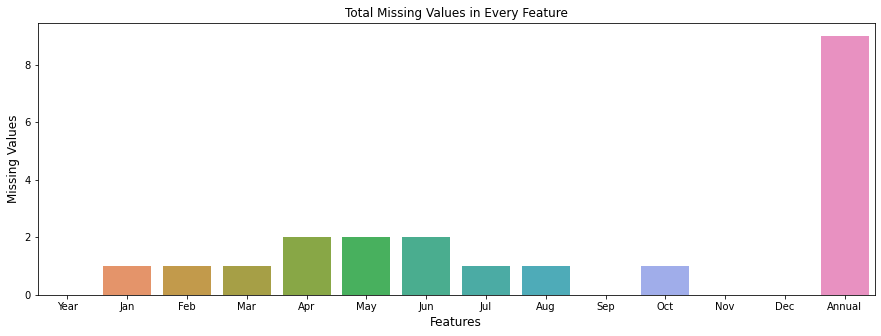

In [342]:
null_values = df.isnull().sum()

plt.figure(figsize=(15,5))
sns.barplot(x=df.columns, y=null_values)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.title('Total Missing Values in Every Feature', fontsize=12)

In [317]:
#df.hist(column=df.columns[-1],figsize=(12,12))

In [343]:
len(df.iloc[2])*0.7

9.799999999999999

In [344]:
for i in df.columns:
    if df[i].isnull().sum() > len(df[i])*0.7:
        df[i].fillna((df[i].mean()), inplace=True)
    else:
        df[i].fillna((df[i].median()), inplace=True)

In [345]:
df.isnull().sum()

Year      0
Jan       0
Feb       0
Mar       0
Apr       0
May       0
Jun       0
Jul       0
Aug       0
Sep       0
Oct       0
Nov       0
Dec       0
Annual    0
dtype: int64

<AxesSubplot:>

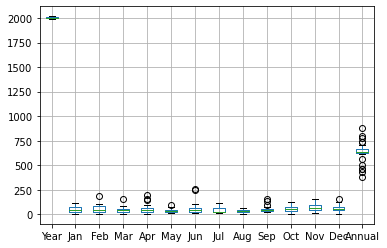

In [347]:
df.boxplot()

In [348]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28.0,2004.500000,8.225975,1991.0,1997.750,2004.50,2011.250,2018.0
Jan,28.0,51.110714,31.761499,5.2,27.075,48.00,74.200,115.8
Feb,28.0,55.878571,42.020175,7.4,26.700,42.80,87.600,191.7
Mar,28.0,45.253571,30.267664,4.9,22.250,46.80,58.475,152.0
Apr,28.0,56.207143,44.492410,7.0,25.300,48.45,62.500,195.0
May,28.0,35.196429,20.146229,13.1,20.850,31.55,45.025,100.6
Jun,28.0,62.403571,60.180208,10.8,22.550,44.10,69.575,253.8
Jul,28.0,42.842857,29.792485,11.2,20.750,29.00,60.800,115.8
Aug,28.0,36.946429,16.962540,7.0,23.875,35.80,49.825,67.6
Sep,28.0,51.310714,31.084810,21.8,32.025,41.85,53.175,152.1


In [346]:
#df.to_csv('df1.csv')

In [350]:
bairnsdale = df[['Year', 'Annual']]
bairnsdale

,Year,Annual
Station Number,,
84100,1991,632.3
84100,1992,877.7
84100,1993,681.6
84100,1994,630.7
84100,1995,737.6
84100,1996,655.7
84100,1997,376.9
84100,1998,710.7
84100,1999,612.4


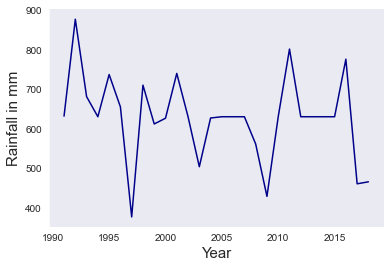

In [385]:
sns.lineplot(data=bairnsdale, x='Year', y='Annual', color='darkblue', markers=True)
#plt.figsize(10,10)
plt.xlabel("Year", size=15)
plt.ylabel("Rainfall in mm", size=15)
sns.set_style("dark")
sns.despine()

In [373]:
c = pd.melt(bairnsdale, id_vars = ['Year'])
c

,Year,variable,value
0,1991,Annual,632.3
1,1992,Annual,877.7
2,1993,Annual,681.6
3,1994,Annual,630.7
4,1995,Annual,737.6
5,1996,Annual,655.7
6,1997,Annual,376.9
7,1998,Annual,710.7
8,1999,Annual,612.4
9,2000,Annual,626.9


<AxesSubplot:xlabel='Year'>

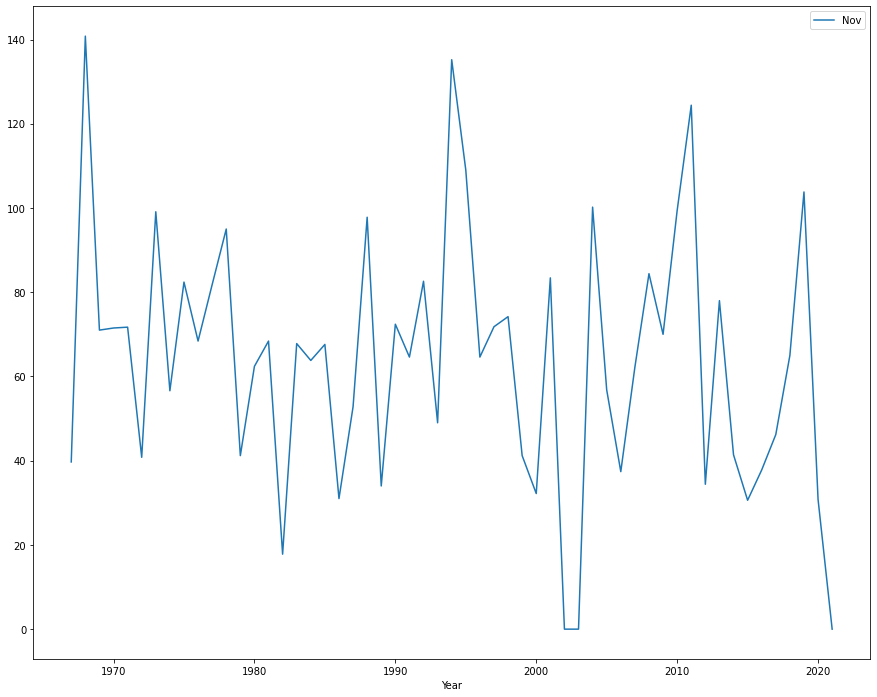

In [301]:
df[['Year', 'Nov']].groupby("Year").sum().plot(stacked=True,figsize=(15,12))

In [227]:
df['Annual'].mean()

626.857894736842

In [235]:
#df.hist(figsize=(12,12))

<AxesSubplot:ylabel='Frequency'>

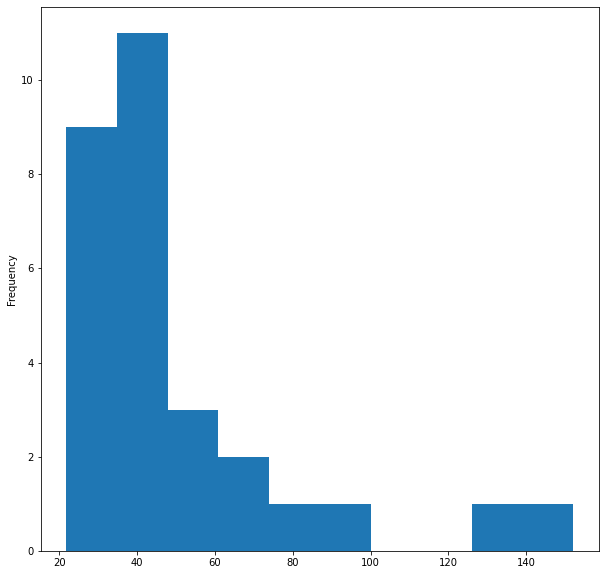

In [114]:
df['Sep'].plot(kind='hist', figsize=(10,10))

<AxesSubplot:ylabel='Station Number'>

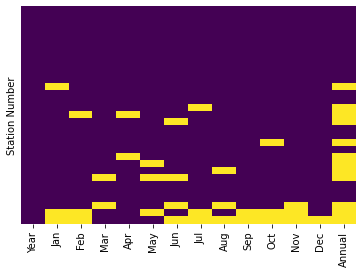

In [49]:
#colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)#sns.color_palette(colours))

In [50]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Station Number,,,,,,,,,,,,,,
84100,1991,115.8,14.5,37.8,23.8,15.1,106.7,115.8,51.1,46.8,33.4,9.3,62.2,632.3
84100,1992,82.4,61.0,48.4,49.5,24.0,99.0,20.3,51.6,134.4,71.2,109.2,126.7,877.7
84100,1993,45.6,55.0,58.4,14.8,23.9,23.2,60.4,22.2,152.1,96.0,52.6,77.4,681.6
84100,1994,26.7,191.7,28.0,34.1,33.4,53.2,14.0,7.8,52.1,44.3,90.0,55.4,630.7
84100,1995,113.2,30.8,41.0,40.6,49.1,40.1,35.4,23.9,64.3,124.1,93.4,81.7,737.6


In [57]:
df = round(df.apply(lambda x: x.fillna(x.mean()), axis=0), 1)

In [59]:
df.isnull().sum()

Year      0
Jan       0
Feb       0
Mar       0
Apr       0
May       0
Jun       0
Jul       0
Aug       0
Sep       0
Oct       0
Nov       0
Dec       0
Annual    0
dtype: int64

C:\Users\prate\anaconda3\envs\r_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual'>

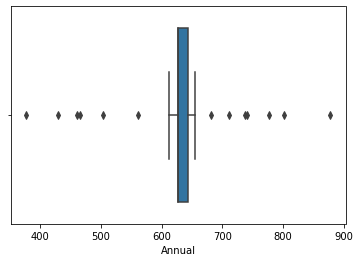

In [65]:
sns.boxplot(df.Annual)

In [111]:
df.skew(axis=0, skipna=None)

Year    0.000000
Jan     0.450193
Feb     1.355465
Mar     1.459702
Apr     1.690991
May     1.409177
Jun     2.282478
Jul     1.102337
Aug     0.782838
Sep     2.170272
Oct     0.461440
Nov     0.400065
Dec     1.062673
dtype: float64

In [72]:
df.kurt(axis=1, skipna=None)

Jan   -0.656712
Feb    2.460533
Mar    2.873726
Apr    2.914056
May    1.829817
Jun    5.289106
Jul    0.262688
Aug    1.226644
Sep    4.769828
Oct   -0.206926
Nov   -0.271964
Dec    1.735699
dtype: float64

In [50]:
#df = df.set_index("Year").T

In [63]:
#df.head()

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,115.8,82.4,45.6,26.7,113.2,85.4,50.8,35.3,89.0,58.4,...,44.4,7.2,29.6,58.0,99.2,14.4,65.5,24.0,NaN,NaN
Feb,14.5,61.0,55.0,191.7,30.8,105.2,9.8,30.7,104.0,21.4,...,65.4,42.8,7.4,28.2,10.4,27.2,25.2,39.2,NaN,NaN
Mar,37.8,48.4,58.4,28.0,41.0,16.4,56.4,17.6,62.8,58.7,...,152.0,51.6,46.8,NaN,85.2,52.6,11.2,NaN,33.6,136.0
Apr,23.8,49.5,14.8,34.1,40.6,56.9,9.6,18.2,54.2,57.6,...,NaN,38.6,94.4,195.0,25.8,78.8,7.0,34.2,85.2,14.4
May,15.1,24.0,23.9,33.4,49.1,31.9,37.0,13.1,34.6,100.6,...,71.2,NaN,21.2,NaN,44.7,18.4,46.0,54.4,NaN,105.3


<AxesSubplot:>

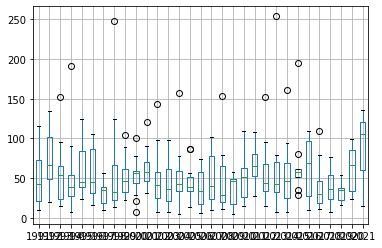

In [68]:
df.boxplot()

In [300]:
ax = df.plot(kind='bar', x=month, y=df1.iloc[1], figsize=(50,20), legend=True, fontsize=30)
ax.legend(prop={'size':40})

KeyError: "None of [Index(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype='object', name='Year')] are in the [columns]"

In [270]:
df.to_csv('bal.csv')